In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from imblearn.over_sampling import SMOTE

In [2]:
fault_test = pd.read_csv("../data/Final_test_data.csv")
fault_test

C:\Users\nitin\AppData\Local\Temp\ipykernel_50280\1480078895.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  fault_test = pd.read_csv("../data/Final_test_data.csv")


,RecordID,EquipmentID,EventTimeStamp,spn,fmi,active,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,EngineCoolantTemperature,...,FuelTemperature,IgnStatus,IntakeManifoldTemperature,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,is_derate_code,target,code_spn_fmi
0,1,1439,2015-02-21 10:47:13,111,17,True,0.000000,14.210000,66.486720,100.400000,...,36.783623,NaN,78.800000,0.000000,3276.750000,66.770922,0.000000,0,0,111_17
1,2,1439,2015-02-21 11:34:34,629,12,True,42.947368,14.484737,66.486720,170.600000,...,36.783623,NaN,107.694737,33.846930,3276.750000,66.770922,6.911667,0,0,629_12
2,4,1369,2015-02-21 11:35:33,1807,2,True,32.600000,14.241071,65.554661,188.738462,...,36.783623,NaN,91.014286,34.561692,3276.750000,66.770922,10.585000,0,0,1807_2
3,6,1417,2015-02-21 11:40:22,111,17,True,48.000000,14.427500,64.622600,181.400000,...,36.783623,NaN,111.200000,13.602200,3276.750000,66.770922,6.670000,0,0,111_17
4,8,1429,2015-02-21 11:40:22,111,17,True,60.000000,14.326000,64.249782,187.520000,...,36.783623,NaN,93.560000,47.231978,3276.750000,66.770922,15.370000,0,0,111_17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425844,1232458,2174,2000-05-30 09:00:59,111,4,True,0.000000,14.500000,0.000000,118.400000,...,36.783623,NaN,84.200000,0.000000,3223.594872,100.000000,0.000000,0,0,111_4
425845,1236126,2206,2000-06-08 12:06:28,37,1,True,0.000000,14.355000,0.000000,170.600000,...,36.783623,NaN,122.000000,0.000000,3223.594872,100.000000,0.000000,0,0,37_1
425846,1237840,2175,2011-01-01 00:03:22,5246,16,True,0.000000,14.427500,0.000000,120.200000,...,36.783623,NaN,93.200000,0.000000,3223.594872,100.000000,0.000000,0,0,5246_16
425847,1237841,2175,2011-01-01 00:03:23,5246,0,True,0.000000,14.427500,0.000000,120.200000,...,36.783623,NaN,93.200000,0.000000,3223.594872,100.000000,0.000000,0,0,5246_0


In [3]:
fault_test = fault_test[fault_test['spn'] != '5246']
fault_test = fault_test.drop(columns=['code_spn_fmi'])

In [4]:
columns_to_use2 = ['RecordID','EquipmentID','EventTimeStamp','spn','fmi','active','AcceleratorPedal','BarometricPressure','CruiseControlSetSpeed','EngineCoolantTemperature','EngineLoad','EngineOilPressure','EngineOilTemperature','EngineRpm','EngineTimeLtd','FuelLevel','FuelLtd','FuelTemperature','IgnStatus','IntakeManifoldTemperature','Speed','SwitchedBatteryVoltage','Throttle','TurboBoostPressure','is_derate_code', 'target']

try2 = fault_test[columns_to_use2]

In [5]:
columns = ['AcceleratorPedal', 'BarometricPressure', 'CruiseControlSetSpeed',
       'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure',
       'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel',
       'FuelLtd', 'FuelTemperature', 'IgnStatus', 'IntakeManifoldTemperature',
       'Speed', 'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure']

for col in columns:

    try2[col] = pd.to_numeric(try2[col], errors='coerce')


    try2[col] = try2.groupby('EquipmentID')[col].transform(
        lambda x: x.fillna(x.mean())
    )


    try2[col] = try2[col].fillna(try2[col].mean())


In [6]:
variables2 = ['RecordID','EquipmentID','EventTimeStamp','spn','fmi','active','AcceleratorPedal','BarometricPressure','CruiseControlSetSpeed','EngineCoolantTemperature','EngineLoad','EngineOilPressure','EngineOilTemperature','EngineRpm','EngineTimeLtd','FuelLevel','FuelLtd','FuelTemperature', 'IntakeManifoldTemperature','Speed','SwitchedBatteryVoltage','Throttle','TurboBoostPressure','is_derate_code']

X = try2[variables2]
y = try2['target']

X.loc[:, 'EquipmentID'] = X['EquipmentID'].astype(str)
cat_variables = ['EquipmentID', 'active']
num_variables = ['RecordID','spn', 'fmi', 'is_derate_code', 'AcceleratorPedal', 'BarometricPressure', 'CruiseControlSetSpeed', 'EngineCoolantTemperature', 'EngineLoad', 'EngineOilPressure', 'EngineOilTemperature', 'EngineRpm', 'EngineTimeLtd', 'FuelLevel', 'FuelLtd', 'FuelTemperature', 'IntakeManifoldTemperature', 'Speed', 'SwitchedBatteryVoltage', 'Throttle', 'TurboBoostPressure']

transformations = ColumnTransformer(
    transformers = [
        ('scaler', StandardScaler(), num_variables), 
        ('ohe', OneHotEncoder(handle_unknown='ignore'), cat_variables), 
        ('drop_id', 'drop', ['RecordID','EventTimeStamp'])
    ], 
    remainder = 'passthrough'
)

In [7]:
X

,RecordID,EquipmentID,EventTimeStamp,spn,fmi,active,AcceleratorPedal,BarometricPressure,CruiseControlSetSpeed,EngineCoolantTemperature,...,EngineTimeLtd,FuelLevel,FuelLtd,FuelTemperature,IntakeManifoldTemperature,Speed,SwitchedBatteryVoltage,Throttle,TurboBoostPressure,is_derate_code
0,1,1439,2015-02-21 10:47:13,111,17,True,0.000000,14.210000,66.486720,100.400000,...,1632.200000,43.200000,12300.907429,36.783623,78.800000,0.000000,3276.750000,66.770922,0.000000,0
1,2,1439,2015-02-21 11:34:34,629,12,True,42.947368,14.484737,66.486720,170.600000,...,1950.531579,73.533333,14350.152604,36.783623,107.694737,33.846930,3276.750000,66.770922,6.911667,0
2,4,1369,2015-02-21 11:35:33,1807,2,True,32.600000,14.241071,65.554661,188.738462,...,9613.873077,63.778889,74823.746553,36.783623,91.014286,34.561692,3276.750000,66.770922,10.585000,0
3,6,1417,2015-02-21 11:40:22,111,17,True,48.000000,14.427500,64.622600,181.400000,...,9480.000000,44.000000,70349.809964,36.783623,111.200000,13.602200,3276.750000,66.770922,6.670000,0
4,8,1429,2015-02-21 11:40:22,111,17,True,60.000000,14.326000,64.249782,187.520000,...,8923.960000,63.778889,68176.836333,36.783623,93.560000,47.231978,3276.750000,66.770922,15.370000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425844,1232458,2174,2000-05-30 09:00:59,111,4,True,0.000000,14.500000,0.000000,118.400000,...,4367.100000,63.200000,28540.884326,36.783623,84.200000,0.000000,3223.594872,100.000000,0.000000,0
425845,1236126,2206,2000-06-08 12:06:28,37,1,True,0.000000,14.355000,0.000000,170.600000,...,4425.300000,47.600000,17626.880170,36.783623,122.000000,0.000000,3223.594872,100.000000,0.000000,0
425846,1237840,2175,2011-01-01 00:03:22,5246,16,True,0.000000,14.427500,0.000000,120.200000,...,4829.050000,93.600000,30812.896059,36.783623,93.200000,0.000000,3223.594872,100.000000,0.000000,0
425847,1237841,2175,2011-01-01 00:03:23,5246,0,True,0.000000,14.427500,0.000000,120.200000,...,4829.050000,93.600000,30812.896059,36.783623,93.200000,0.000000,3223.594872,100.000000,0.000000,0


In [8]:
from imblearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 321,test_size=0.3,stratify=y)
pipe = Pipeline(steps = [
    ('transformations', transformations), 
    ('smote', SMOTE(random_state=321)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformations',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['RecordID', 'spn', 'fmi',
                                                   'is_derate_code',
                                                   'AcceleratorPedal',
                                                   'BarometricPressure',
                                                   'CruiseControlSetSpeed',
                                                   'EngineCoolantTemperature',
                                                   'EngineLoad',
                                                   'EngineOilPressure',
                                                   'EngineOilTemperature',
                                                   'EngineRpm', 'EngineTimeLtd',
                                                   'FuelLevel', 'FuelLtd',
                                                   'FuelTemperature',
                                                   'IntakeManifoldTemperature',
                                                   'Speed',
                                                   'SwitchedBatteryVoltage',
                                                   'Throttle',
                                                   'TurboBoostPressure']),
                                                 ('ohe',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['EquipmentID', 'active']),
                                                 ('drop_id', 'drop',
                                                  ['RecordID',
                                                   'EventTimeStamp'])])),
                ('smote', SMOTE(random_state=321)),
                ('rf', RandomForestClassifier(random_state=42))])

In [9]:
y_pred_lr = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

0.9990137372314195
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127545
           1       0.80      0.53      0.64       210

    accuracy                           1.00    127755
   macro avg       0.90      0.77      0.82    127755
weighted avg       1.00      1.00      1.00    127755



In [10]:
confusion_matrix(y_test, y_pred_lr)

array([[127517,     28],
       [    98,    112]], dtype=int64)

In [11]:
from sklearn.metrics import precision_recall_curve
import numpy as np

# Predict probabilities again
y_proba = pipe.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Find the threshold that gives maximum F1
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold for Maximum F1-Score: {best_threshold:.4f}")


Best Threshold for Maximum F1-Score: 0.3300


In [12]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
#Apply the best threshold
y_pred_best = (y_proba >= best_threshold).astype(int)

print("\nConfusion Matrix (Best Threshold):")
cm=confusion_matrix(y_test, y_pred_best)

cm_df = pd.DataFrame(
    cm,
    index=['Actual Negative (0)', 'Actual Positive (1)'],
    columns=['Predicted Negative (0)', 'Predicted Positive (1)']
)

print("\nConfusion Matrix (User-Friendly):")
print(cm_df)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")



Confusion Matrix (Best Threshold):

Confusion Matrix (User-Friendly):
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                  127488                      57
Actual Positive (1)                      75                     135

Accuracy: 0.9990
Precision: 0.7031
Recall: 0.6429
F1 Score: 0.6716


In [13]:
cm_df

,Predicted Negative (0),Predicted Positive (1)
Actual Negative (0),127488,57
Actual Positive (1),75,135


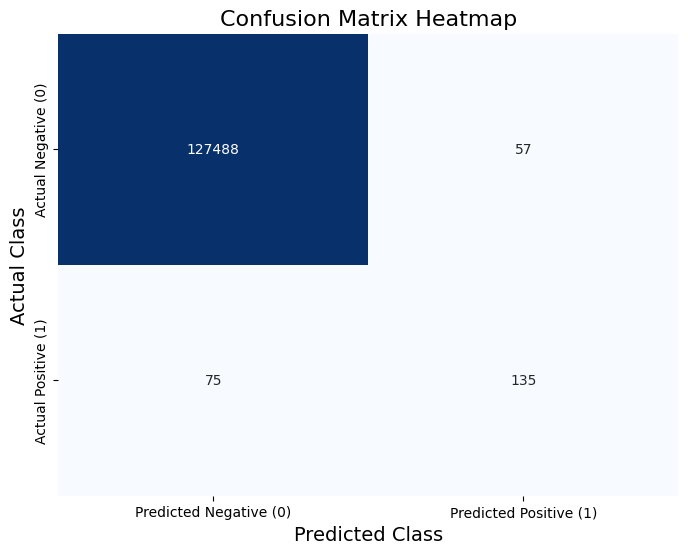

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix Heatmap', fontsize=16)
plt.ylabel('Actual Class', fontsize=14)
plt.xlabel('Predicted Class', fontsize=14)
plt.show()

In [15]:
# Lower threshold a bit more
new_threshold = 0.28

y_pred_lower_threshold = (y_proba >= new_threshold).astype(int)

# Re-evaluate

print("\nConfusion Matrix (Lowered Threshold):")
print(confusion_matrix(y_test, y_pred_lower_threshold))

print(f"\nPrecision: {precision_score(y_test, y_pred_lower_threshold):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_lower_threshold):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_lower_threshold):.4f}")



Confusion Matrix (Lowered Threshold):
[[127461     84]
 [    71    139]]

Precision: 0.6233
Recall: 0.6619
F1 Score: 0.6420


In [16]:
# New relaxed conditions
precision_min = 0.65
recall_min = 0.70

valid_thresholds = []

for i, t in enumerate(thresholds):
    if precisions[i] >= precision_min and recalls[i] >= recall_min:
        valid_thresholds.append((t, precisions[i], recalls[i]))

#Pick best among valid thresholds
if valid_thresholds:
    best_valid = max(valid_thresholds, key=lambda x: 2 * (x[1] * x[2]) / (x[1] + x[2] + 1e-8))
    best_threshold = best_valid[0]
    print(f"\n Found Relaxed Threshold: {best_threshold:.4f} with Precision={best_valid[1]:.4f} and Recall={best_valid[2]:.4f}")
else:
    print("\n Even relaxed conditions not met.")



 Even relaxed conditions not met.


In [17]:
#  Apply the best relaxed threshold
final_threshold = 0.25

y_pred_final = (y_proba >= final_threshold).astype(int)

#  Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("\nConfusion Matrix (Final Threshold 0.25):")
print(confusion_matrix(y_test, y_pred_final))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_final):.4f}")
print(classification_report(y_test, y_pred_final, digits=4))


Confusion Matrix (Final Threshold 0.25):
[[127439    106]
 [    62    148]]

Accuracy: 0.9987
Precision: 0.5827
Recall: 0.7048
F1 Score: 0.6379
              precision    recall  f1-score   support

           0     0.9995    0.9992    0.9993    127545
           1     0.5827    0.7048    0.6379       210

    accuracy                         0.9987    127755
   macro avg     0.7911    0.8520    0.8186    127755
weighted avg     0.9988    0.9987    0.9987    127755



In [18]:
import joblib
# Save trained pipeline
joblib.dump(pipe, 'bigG_model_randomForest.pkl')

# Save threshold separately
with open('best_threshold.txt', 'w') as f:
    f.write(str(final_threshold))

In [19]:
from xgboost import XGBClassifier

pipe = Pipeline(steps = [
    ('transformations', transformations), 
    ('smote', SMOTE(random_state=321)),
    ('xgb', XGBClassifier(n_estimators=300, random_state=42,n_jobs=-1,scale_pos_weight=100))
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('transformations',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('scaler', StandardScaler(),
                                                  ['RecordID', 'spn', 'fmi',
                                                   'is_derate_code',
                                                   'AcceleratorPedal',
                                                   'BarometricPressure',
                                                   'CruiseControlSetSpeed',
                                                   'EngineCoolantTemperature',
                                                   'EngineLoad',
                                                   'EngineOilPressure',
                                                   'EngineOilTemperature',
                                                   'EngineRpm', 'EngineTimeLtd',
                                                   'FuelLevel', 'Fue...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=300, n_jobs=-1,
                               num_parallel_tree=None, random_state=42, ...))])

In [20]:
y_pred_xgb = pipe.predict(X_test)
print(accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))

0.99756565300771
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    127545
           1       0.38      0.74      0.50       210

    accuracy                           1.00    127755
   macro avg       0.69      0.87      0.75    127755
weighted avg       1.00      1.00      1.00    127755



In [21]:
confusion_matrix(y_test, y_pred_xgb)

array([[127289,    256],
       [    55,    155]], dtype=int64)

Use cross validation

In [22]:
# Predict probabilities again
y_proba = pipe.predict_proba(X_test)[:, 1]

# Calculate precision, recall, thresholds
precisions, recalls, thresholds = precision_recall_curve(y_test, y_proba)

# Calculate F1 for each threshold
f1_scores = 2 * (precisions * recalls) / (precisions + recalls + 1e-8)

# Find the threshold that gives maximum F1
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold for Maximum F1-Score: {best_threshold:.4f}")

Best Threshold for Maximum F1-Score: 0.9864


In [23]:
y_pred_best = (y_proba >= best_threshold).astype(int)

print("\nConfusion Matrix (Best Threshold):")
cm=confusion_matrix(y_test, y_pred_best)

cm_df = pd.DataFrame(
    cm,
    index=['Actual Negative (0)', 'Actual Positive (1)'],
    columns=['Predicted Negative (0)', 'Predicted Positive (1)']
)

print("\nConfusion Matrix (User-Friendly):")
print(cm_df)

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_best):.4f}")



Confusion Matrix (Best Threshold):

Confusion Matrix (User-Friendly):
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                  127519                      26
Actual Positive (1)                      86                     124

Accuracy: 0.9991
Precision: 0.8267
Recall: 0.5905
F1 Score: 0.6889


In [24]:
# New relaxed conditions
precision_min = 0.70
recall_min = 0.70

valid_thresholds = []

for i, t in enumerate(thresholds):
    if precisions[i] >= precision_min and recalls[i] >= recall_min:
        valid_thresholds.append((t, precisions[i], recalls[i]))

#Pick best among valid thresholds
if valid_thresholds:
    best_valid = max(valid_thresholds, key=lambda x: 2 * (x[1] * x[2]) / (x[1] + x[2] + 1e-8))
    best_threshold = best_valid[0]
    print(f"\n Found Relaxed Threshold: {best_threshold:.4f} with Precision={best_valid[1]:.4f} and Recall={best_valid[2]:.4f}")
else:
    print("\n Even relaxed conditions not met.")


 Even relaxed conditions not met.


In [29]:
final_threshold = 0.98

y_pred_final = (y_proba >= final_threshold).astype(int)

#  Evaluate
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

print("\nConfusion Matrix (Final Threshold ):")
print(confusion_matrix(y_test, y_pred_final))

print(f"\nAccuracy: {accuracy_score(y_test, y_pred_final):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_final):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_final):.4f}")
print(f"F1 Score: {f1_score(y_test, y_pred_final):.4f}")
print(classification_report(y_test, y_pred_final, digits=4))


Confusion Matrix (Final Threshold ):
[[127516     29]
 [    86    124]]

Accuracy: 0.9991
Precision: 0.8105
Recall: 0.5905
F1 Score: 0.6832
              precision    recall  f1-score   support

           0     0.9993    0.9998    0.9995    127545
           1     0.8105    0.5905    0.6832       210

    accuracy                         0.9991    127755
   macro avg     0.9049    0.7951    0.8414    127755
weighted avg     0.9990    0.9991    0.9990    127755



In [26]:
# Save trained pipeline
joblib.dump(pipe, 'bigG_model_xgb_classifier.pkl')

['bigG_model_xgb_classifier.pkl']

In [27]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

accuracies = []
fold = 1
conf_matrices=[]
precisions = []
recalls = []
f1s = []

for train_idx, val_idx in skf.split(X, y):
    
    X_train, X_val = X.iloc[train_idx], X.iloc[val_idx]
    y_train, y_val = y.iloc[train_idx], y.iloc[val_idx]
    
    # Train on train fold
    #pipeline.fit(X_train, y_train)
    pipe.fit(X_train, y_train)
    
    # Predict on validation fold
    y_pred = pipe.predict(X_val)
    
    # Calculate Accuracy
    acc = accuracy_score(y_val, y_pred)
    accuracies.append(acc)

    cm = confusion_matrix(y_val, y_pred)
    conf_matrices.append(cm)

    precisions.append(precision_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    f1s.append(f1_score(y_val, y_pred))

    # Display confusion matrix
    cm_df = pd.DataFrame(
        cm,
        index=['Actual Negative (0)', 'Actual Positive (1)'],
        columns=['Predicted Negative (0)', 'Predicted Positive (1)']
    )

    print(f"\n Fold {fold} Confusion Matrix:")
    print(cm_df)
    print(f"Fold {fold} Accuracy: {acc:.4f}")
    print(f"\n Fold {fold} precision:")
    print(precision_score(y_val, y_pred))
    print(f"\n Fold {fold} recall:")
    print(recall_score(y_val, y_pred))
    print(f"\n Fold {fold} f1_score:")
    print(f1_score(y_val, y_pred))
    fold += 1

# Step 5: Report Overall Accuracy
print(f"\nAverage StratifiedKFold Accuracy: {np.mean(accuracies):.4f}")
print(f"\nAverage Precision: {np.mean(precisions):.4f}")
print(f"Average Recall: {np.mean(recalls):.4f}")
print(f"Average F1 Score: {np.mean(f1s):.4f}")


 Fold 1 Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                   84726                     304
Actual Positive (1)                      32                     108
Fold 1 Accuracy: 0.9961

 Fold 1 precision:
0.2621359223300971

 Fold 1 recall:
0.7714285714285715

 Fold 1 f1_score:
0.391304347826087

 Fold 2 Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                   84772                     258
Actual Positive (1)                      31                     109
Fold 2 Accuracy: 0.9966

 Fold 2 precision:
0.2970027247956403

 Fold 2 recall:
0.7785714285714286

 Fold 2 f1_score:
0.42998027613412226

 Fold 3 Confusion Matrix:
                     Predicted Negative (0)  Predicted Positive (1)
Actual Negative (0)                   84795                     235
Actual Positive (1)                      33                     107
Fold 3 Accuracy: 0.9969

 Fold 3 